# K-Means simulations

<ipython-input-22-dbb03d79091b>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis', alpha=0.5)


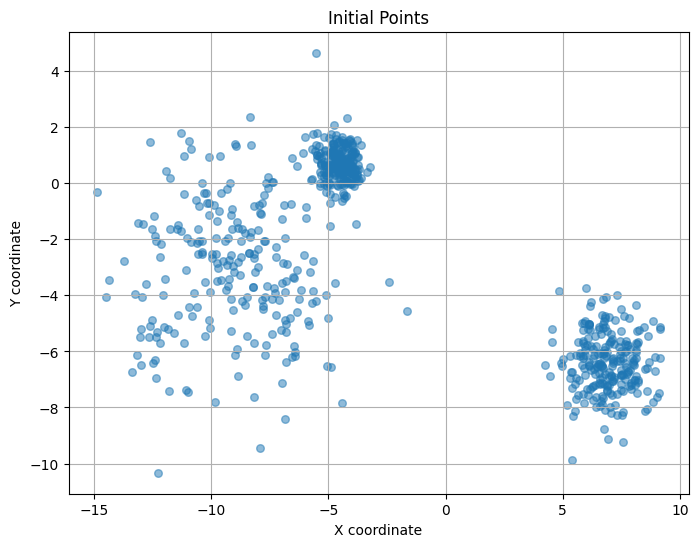

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(15)

# Parameters for the clusters
n_samples = 700
centers = [(0, 0), (5, 5), (8, 10), (10, 0)]
cluster_std = [1, 2.5, 0.5]

# Generating synthetic data
X, y = make_blobs(n_samples=n_samples, cluster_std=cluster_std, n_features=2, random_state=15)

#plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis', alpha=0.5)
plt.title('Initial Points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


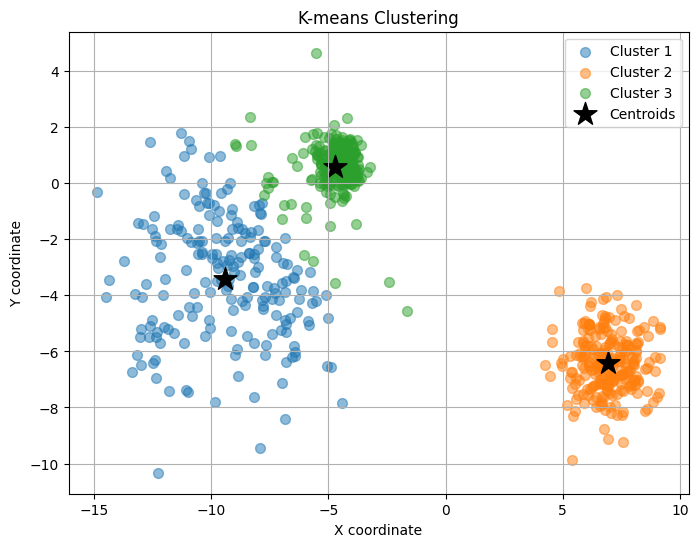

In [23]:
from sklearn.cluster import KMeans

# Number of clusters
k = 3

# Running K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

labels = kmeans.predict(X)

#plotting
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}', s=50, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.title('K-means Clustering')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()


## Number of clusters

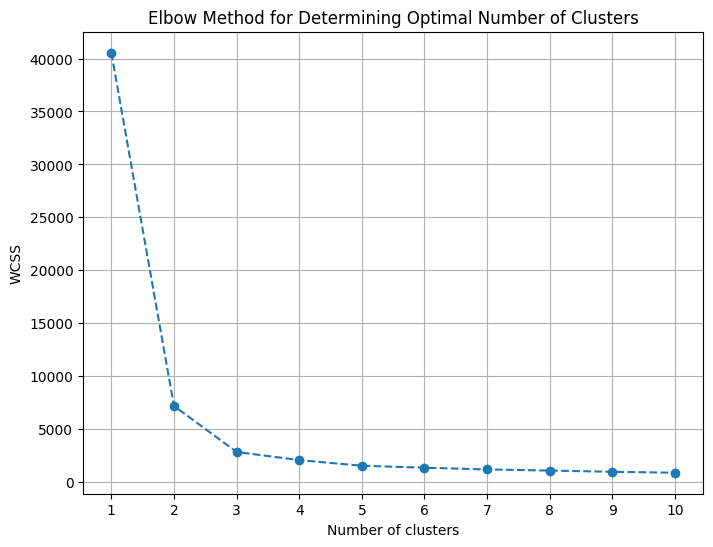

In [24]:
wcss = [] #within-cluster sum of squares
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

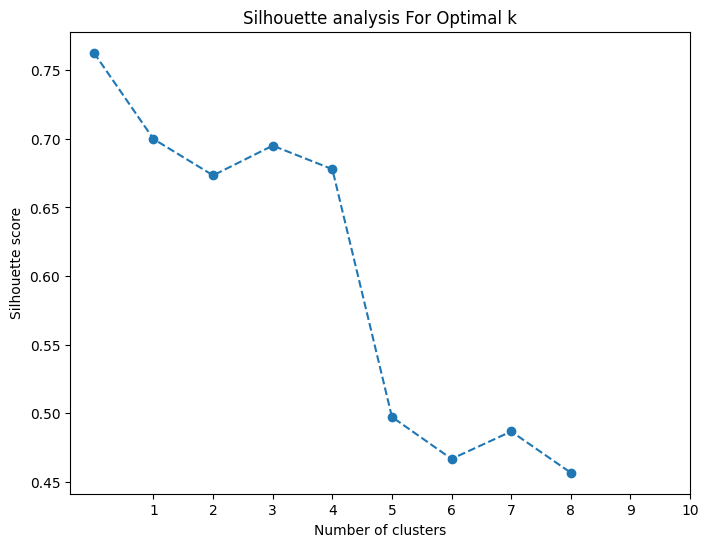

In [25]:
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_avg = []
for num_clusters in range(2, 11):

 kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
 kmeans.fit(X)
 labels = kmeans.labels_

 # silhouette score
 silhouette_avg.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 6))
plt.plot(silhouette_avg, marker='o', linestyle='--')
plt.ylabel('Silhouette score')
plt.xlabel('Number of clusters')
plt.xticks(range(1, 11))
plt.title('Silhouette analysis For Optimal k')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


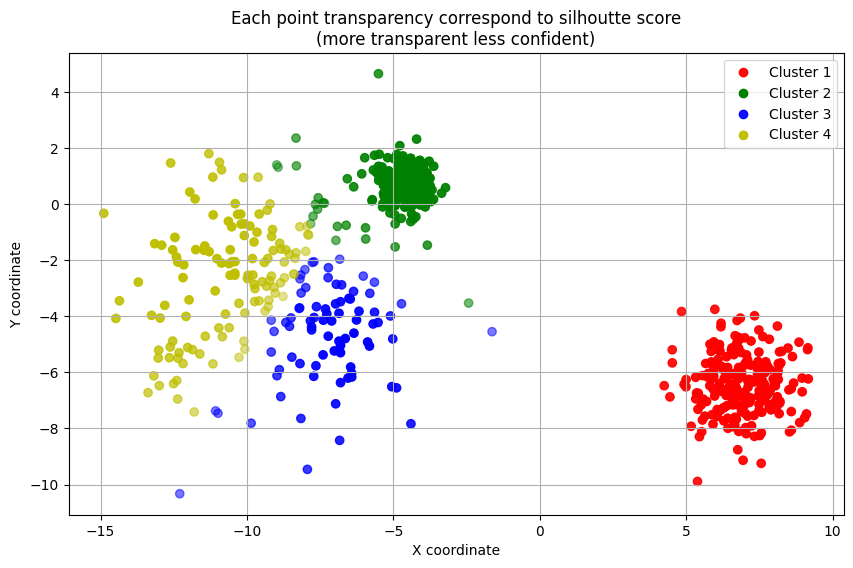

In [28]:
silhouette_vals = silhouette_samples(X, labels)
k = 4

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, labels)

plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_i = X[labels == i]
    c = colors[i]
    plt.scatter(cluster_i[:, 0], cluster_i[:, 1], color=c, \
               # s=10 + 20 * cluster_silhouette_vals / np.max(cluster_silhouette_vals),
                             alpha=0.5 + 0.5 * (cluster_silhouette_vals / np.max(cluster_silhouette_vals)),
                label=f'Cluster {i+1}')

plt.title('Each point transparency correspond to silhoutte score\n(more transparent less confident)')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

## Initialization

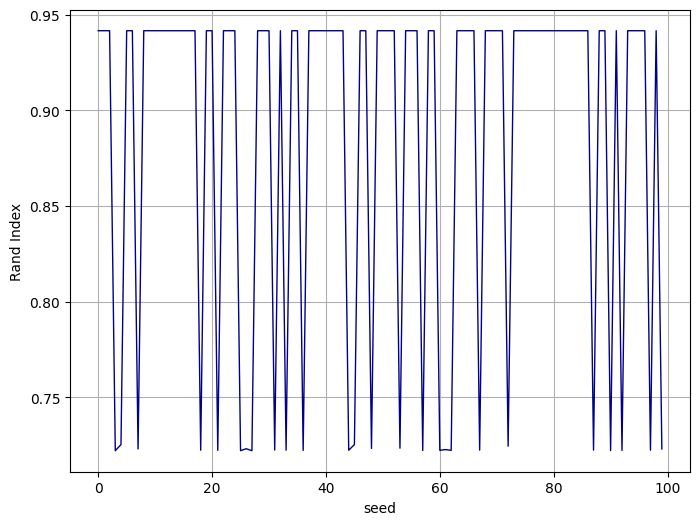

In [6]:
from sklearn.metrics import rand_score

accuracy_list = []

for seed in range(100):
  kmeans_rdm = KMeans(n_clusters=k, random_state=seed, init='random', n_init=1)
  kmeans_rdm.fit(X)

  labels = kmeans_rdm.predict(X)
  accuracy = rand_score(y, labels)
  accuracy_list.append(accuracy)

#plotting
plt.figure(figsize=(8, 6))
plt.plot(accuracy_list, c='darkblue', linewidth=1)
plt.xlabel('seed')
plt.ylabel('Rand Index')
plt.grid(True)

plt.show()


<ipython-input-7-e81532be57d2>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}', s=50, cmap='viridis', alpha=0.5)


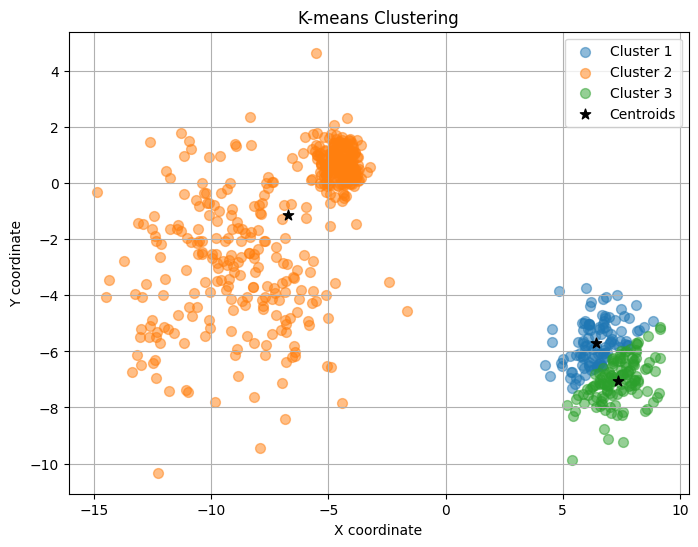

In [7]:
kmeans = KMeans(n_clusters=k, random_state=60, n_init=1, init='random')
kmeans.fit(X)

labels = kmeans.predict(X)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}', s=50, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, c='black', label='Centroids', marker='*')
plt.title('K-means Clustering')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
plt.grid(True)
plt.show()

## Skicit-learn example on limitations of k-means

Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py

In [8]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

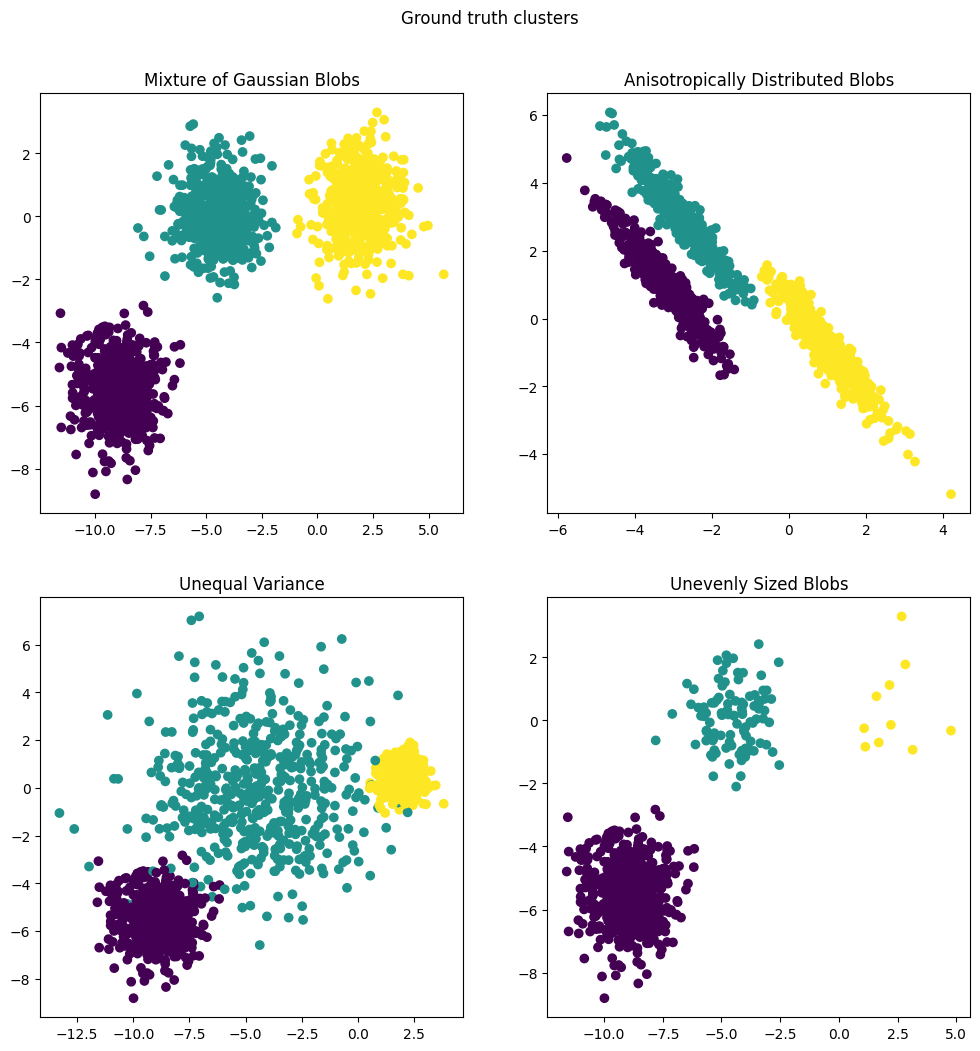

In [9]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)

plt.show()

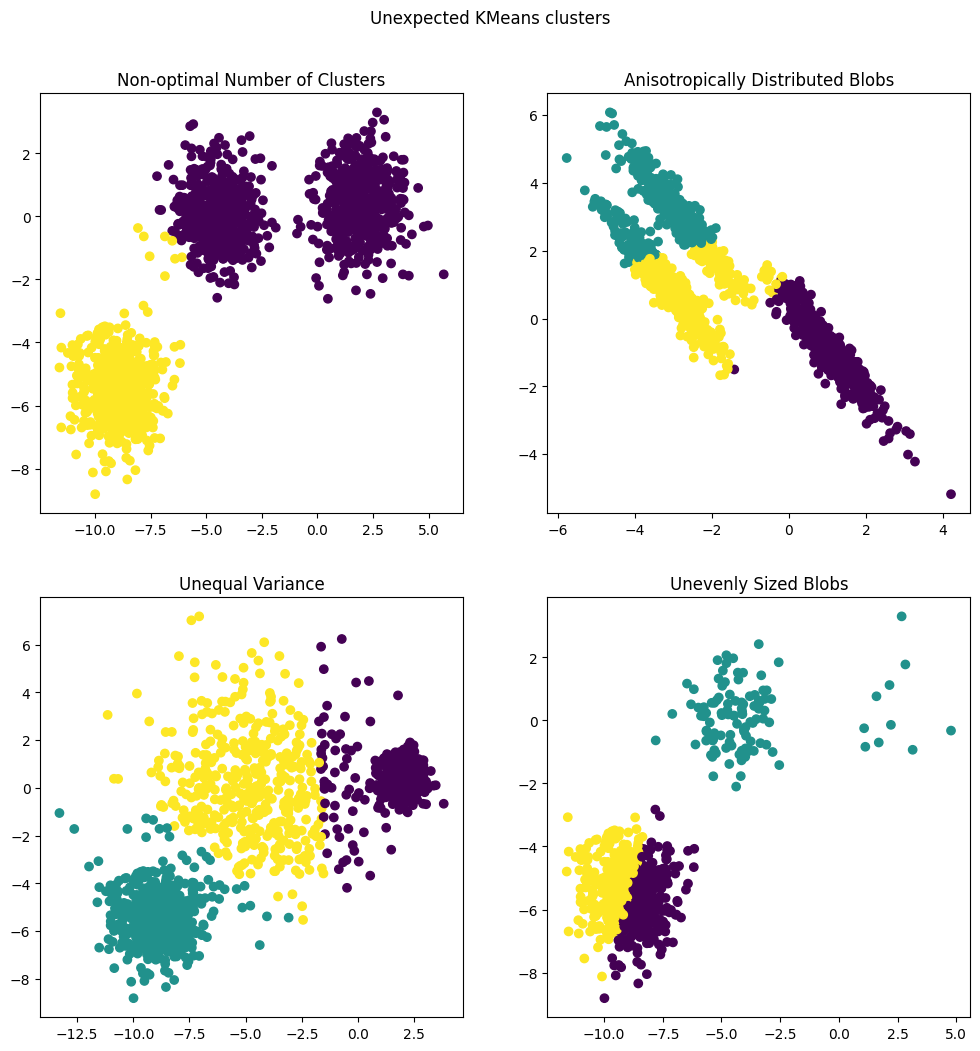

In [10]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)

plt.show()